0.46507414791367274
-0.3231474910257379


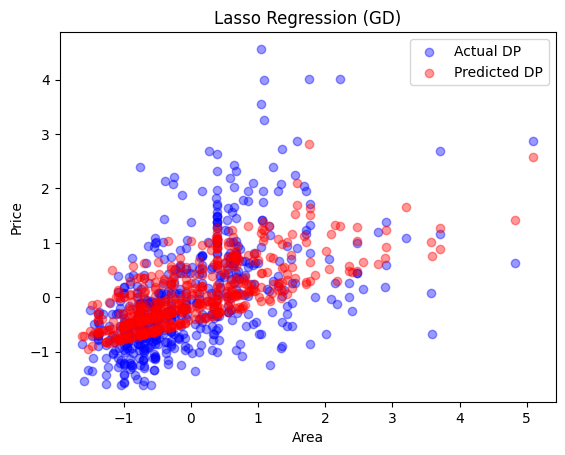

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

csv=pd.read_csv('Housing.csv')
# print(csv.head())

x_pn=np.array(csv[['area','bedrooms','bathrooms','stories','parking']])
y_pn=np.array(csv['price'])

# z score normalization
x=(x_pn-np.mean(x_pn,axis=0))/(np.std(x_pn,axis=0))
y=(y_pn-(np.mean(y_pn)))/(np.std(y_pn))

# print(y.shape)
# y=y.reshape(-1,1)
# # print(y.shape)
# n=y.shape
# X=np.c_[np.ones((y.shape[0],1)),x]
# # print(X.shape)
# beta=np.zeros((X.shape[1],1))
# print(beta.shape)

def Lasso_GD(x,y,L_lamda,learning_rate,n_iteration):
    y=y.reshape(-1,1)
    X=np.c_[np.ones((y.shape[0],1)),x]
    beta=np.zeros((X.shape[1],1))

    for _ in range(n_iteration):
        n=len(y)
        y_pred=X @ beta
        cost_function=y_pred - y
        # gradient
        dm=(1/n)*(X.T @ cost_function)
        z=beta-learning_rate*dm
        beta=np.sign(z)*np.maximum(np.abs(z)-learning_rate*L_lamda,0)

    
    # model prediction
    y_predicted=X @ beta

    # model evaluation
    mse=mean_squared_error(y_predicted,y)
    r2=r2_score(y_predicted,y)
    print(mse)
    print(r2)

    # plotting
    # area, actual price
    plt.scatter(x[:,0],y,color='blue',alpha=0.4,label='Actual DP')
    # area, predicted price
    plt.scatter(x[:,0],y_predicted,color='red',alpha=0.4,label='Predicted DP')
    plt.legend()
    plt.xlabel('Area')
    plt.ylabel('Price')
    plt.title('Lasso Regression (GD)')
    plt.show()


Lasso_GD(x,y,0.1,0.001,10000)



